In [52]:
import torch
import glob
import os
from PIL import Image
import cv2
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [68]:
import torch.utils.data as data

class DataLoaderSegmentation(data.Dataset):
    def __init__(self, folder_path):
        super(DataLoaderSegmentation, self).__init__()
        self.img_files = glob.glob(os.path.join(folder_path,'images','*.png'))
        self.mask_files = []
        for img_path in self.img_files:
             self.mask_files.append(os.path.join(folder_path,'labels',os.path.basename(img_path.split(".")[0] + "_Annotation.png"))) 

    def __getitem__(self, index):
            img_path = self.img_files[index]
            mask_path = self.mask_files[index]
            data = cv2.imread(img_path, cv2.IMREAD_COLOR)
            label = cv2.imread(mask_path, cv2.IMREAD_COLOR)
            return torch.from_numpy(data).float().permute(2,1,0), torch.from_numpy(label).float().permute(2,1,0)

    def __len__(self):
        return len(self.img_files)

In [69]:
dataset = DataLoaderSegmentation(r"C:\\College\\Origin Health\\origin_health_role_challenge_dataset\\interview\\train")

torch.Size([3, 800, 540]) torch.Size([3, 800, 540])
torch.Size([540, 800, 3])


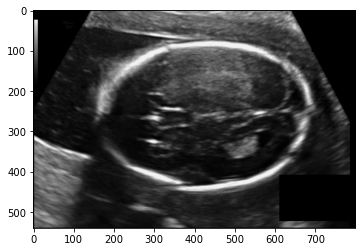

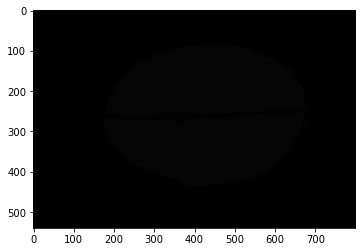

torch.Size([3, 800, 540])


In [75]:
image, mask = dataset.__getitem__(5)
print(image.shape, mask.shape)
print(image.permute(2, 1, 0).shape)
plt.imshow(image.permute(2, 1, 0)/255)
plt.show()
plt.imshow(mask.permute(2, 1, 0)/255)
plt.show()